In [ ]:
from google.colab import drive

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn  import metrics

import numpy as np
import pandas as pd
import lightgbm as lgb
import seaborn as sns

import matplotlib.pyplot as plt

In [ ]:
drive.mount('/content/drive')
cur_path = "drive/MyDrive/minicurso/"

Mounted at /content/drive


In [ ]:
df  = pd.read_csv(cur_path + 'network_flows.csv', sep=';', low_memory=False)

In [ ]:
df.shape

(728108, 88)

In [ ]:
df.drop(['id', 'src_ip', 'src_mac', 'src_oui', 'dst_ip', 'dst_mac', 'dst_oui', 'vlan_id', 'src2dst_first_seen_ms', 'src2dst_last_seen_ms',
         'dst2src_first_seen_ms', 'dst2src_last_seen_ms', 'tunnel_id', 'application_name', 'application_category_name', 'application_is_guessed',
         'application_confidence', 'requested_server_name', 'client_fingerprint', 'server_fingerprint', 'user_agent', 'content_type' , 'data',
         'bidirectional_first_seen_ms', 'bidirectional_last_seen_ms'], axis=1, inplace=True)



In [ ]:
df.shape

(728108, 63)

In [ ]:
df['target'].value_counts()

1    364054
0    364054
Name: target, dtype: int64

In [ ]:
# Divisão dos dados em conjuntos de treino e teste
X = df.drop('target', axis=1)  # Features
y = df['target']  # Rótulo

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Criar o modelo LightGBM
model = lgb.LGBMClassifier()

In [ ]:
# Treinar o modelo
model.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 291351, number of negative: 291135
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.312458 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8940
[LightGBM] [Info] Number of data points in the train set: 582486, number of used features: 53
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500185 -> initscore=0.000742
[LightGBM] [Info] Start training from score 0.000742
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

LGBMClassifier()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred

array([0, 1, 0, ..., 1, 0, 0])

In [ ]:
Y_prob = model.predict_proba(X_test)[:, 1]

In [ ]:
print(f"AUC test: {roc_auc_score(y_test, y_pred)}")

AUC test: 1.0


In [ ]:
print(f'Acurácia test: {accuracy_score(y_test, y_pred)}\n')

Acurácia test: 1.0



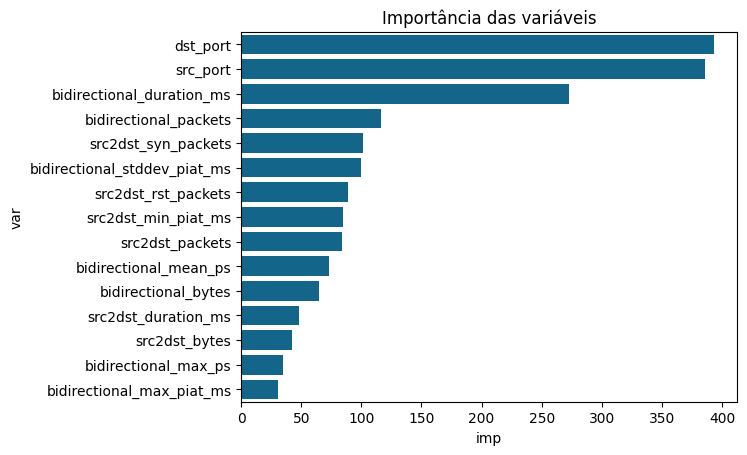

In [ ]:
imp = pd.DataFrame(model.feature_importances_, X_test.columns).reset_index()
imp.columns = ["var", "imp"]
imp = imp.sort_values("imp", ascending=False)

sns.barplot(x="imp", y="var", color="#006e9cff", data=imp.iloc[:15])

plt.title(f"Importância das variáveis")
plt.show()

In [ ]:
classification_rep = classification_report(y_test, y_pred)
print('Relatório de Classificação:\n', classification_rep)

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     72919
           1       1.00      1.00      1.00     72703

    accuracy                           1.00    145622
   macro avg       1.00      1.00      1.00    145622
weighted avg       1.00      1.00      1.00    145622



In [ ]:
# Calcular a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

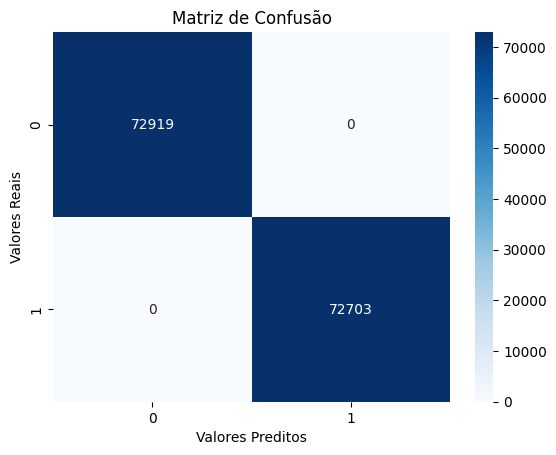

In [ ]:
import seaborn as sns

# Define as classes
classes = np.unique(y_test)

# Cria o heatmap da matriz de confusão
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)

# Adiciona rótulos aos eixos
plt.title('Matriz de Confusão')
plt.xlabel('Valores Preditos')
plt.ylabel('Valores Reais')

# Exibe o gráfico
plt.show()
